# Task 2.3 Perceptron

Importar las librerias necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Cargar el dataset de Iris

In [12]:
iris = load_iris()
X = iris.data[:, :2]  # solo se toman los dos features (sepal length y sepal width)
y = (iris.target == 0).astype(int)  # se convierte a problema de clasificación binaria (0 si es clase 0, 1 de lo contrario)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


Dividir el conjunto de datos en entrenamiento y prueba

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Implementación del Perceptron con `fit` y `predict`

In [4]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        for _ in range(self.n_iterations):
            for xi, target in zip(X, y):
                linear_output = np.dot(xi, self.weights) + self.bias
                prediction = np.where(linear_output >= 0, 1, 0)
                update = self.learning_rate * (target - prediction)
                self.weights += update * xi
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)


Ajustar con datos de entrenamiento y frontera de decisión

Precisión del modelo de perceptrón: 1.0


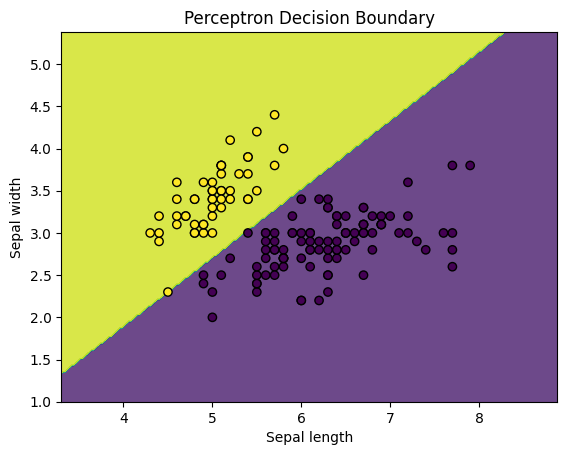

In [5]:
# Instanciar y entrenar el perceptrón
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

# Predecir en los datos de prueba
y_pred = perceptron.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de perceptrón:", accuracy)

# Visualizar la frontera de decisión
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Perceptron Decision Boundary')
plt.show()
